This notebook explores the results of the hyperparameter optimization.

Checks the score of the best solution of each hyperparameter and also plots the population evolution across generations.

---
Author: Jordi Grau Escolano


# 1. Load data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import math
import sys
from pathlib import Path
import os
import re

project_root = Path().resolve().parents[0]
sys.path.insert(0, str(project_root))
print(project_root)

from paths import *

# 1. Load data
ROOT = '..'
experiment = '/GA_hyperparameter_optimization_60_stations'
file_exploration = f'{ROOT}/{PR_EXP}/{experiment}/GA_exploration_tracking.csv'
file_scores = f'{ROOT}/{PR_EXP}/{experiment}/GA_scores_and_nodes.csv'
df_e = pd.read_csv(file_exploration).sort_values(['experiment_idx', 'gen'])
df_s = pd.read_csv(file_scores).sort_values('experiment_index')
df_s.drop(['execution_id', 'experiment_idx'], axis=1, inplace=True)
df_s.rename(columns={'experiment_index': 'experiment_idx'}, inplace=True)

# Process dicts and list
cols = ['best_solution', 'generation_scores', 'jaccard_diversities', 'avg_scores']
for col in cols:
    df_s[col] = df_s[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

/home


,population_size,mutation_rate,elite_fraction,selection_strategy,crossover_strategy,best_score,minutes_to_complete
109,50.0,0.05,0.05,roulette,greedy,54.718750,59.485865
11,50.0,0.05,0.10,roulette,greedy,54.640625,89.028320
24,50.0,0.10,0.10,tournament,greedy,54.625000,46.768356
125,50.0,0.10,0.10,tournament,greedy,54.614583,45.960740
95,200.0,0.05,0.10,roulette,greedy,54.614583,66.948216
3,50.0,0.05,0.05,roulette,greedy,54.598958,48.156591
97,200.0,0.05,0.05,roulette,greedy,54.593750,107.438883
94,100.0,0.20,0.10,roulette,greedy,54.593750,65.909482
130,50.0,0.10,0.20,roulette,greedy,54.572917,40.848305
121,50.0,0.10,0.05,tournament,greedy,54.562500,41.498094


# 2. Check best combinations

In [23]:
# Get best avg score of all generations
df_s['best_avg_score'] = df_s['avg_scores'].apply(lambda x: x[-1])

sort_by = 'best_avg_score'
df_s[['experiment_idx', 'best_avg_score', 'best_score', 'minutes_to_complete', 'generations',
      'population_size', 'mutation_rate', 'elite_fraction', 'selection_strategy', 'crossover_strategy'
      ]].sort_values(sort_by, ascending=False).round(2).head(10)

,experiment_idx,best_avg_score,best_score,minutes_to_complete,generations,population_size,mutation_rate,elite_fraction,selection_strategy,crossover_strategy
109,100.0,53.57,54.72,59.49,2610.0,50.0,0.05,0.05,roulette,greedy
11,7.0,53.47,54.64,89.03,4750.0,50.0,0.05,0.10,roulette,greedy
114,110.0,53.45,54.55,79.54,3820.0,50.0,0.05,0.10,roulette,greedy
97,109.0,53.37,54.59,107.44,1480.0,200.0,0.05,0.05,roulette,greedy
95,115.0,53.36,54.61,66.95,930.0,200.0,0.05,0.10,roulette,greedy
45,55.0,53.34,54.54,103.64,2660.0,100.0,0.05,0.05,roulette,greedy
61,58.0,53.33,54.52,87.25,2210.0,100.0,0.05,0.05,tournament,greedy
3,1.0,53.31,54.60,48.16,2210.0,50.0,0.05,0.05,roulette,greedy
46,67.0,53.30,54.38,38.94,1150.0,100.0,0.05,0.20,roulette,greedy
102,121.0,53.30,54.49,93.31,1360.0,200.0,0.05,0.20,roulette,greedy


In [24]:
sort_by = 'best_score'
df_s[['best_avg_score', 'best_score', 'minutes_to_complete', 'generations',
      'population_size', 'mutation_rate', 'elite_fraction', 'selection_strategy', 'crossover_strategy'
      ]].reset_index(names='experiment_idx').sort_values(sort_by, ascending=False).round(2).head(10)

,experiment_idx,best_avg_score,best_score,minutes_to_complete,generations,population_size,mutation_rate,elite_fraction,selection_strategy,crossover_strategy
99,109,53.57,54.72,59.49,2610.0,50.0,0.05,0.05,roulette,greedy
6,11,53.47,54.64,89.03,4750.0,50.0,0.05,0.10,roulette,greedy
27,24,52.06,54.62,46.77,2170.0,50.0,0.10,0.10,tournament,greedy
140,125,52.49,54.61,45.96,2000.0,50.0,0.10,0.10,tournament,greedy
118,95,53.36,54.61,66.95,930.0,200.0,0.05,0.10,roulette,greedy
0,3,53.31,54.60,48.16,2210.0,50.0,0.05,0.05,roulette,greedy
110,97,53.37,54.59,107.44,1480.0,200.0,0.05,0.05,roulette,greedy
96,94,50.14,54.59,65.91,1140.0,100.0,0.20,0.10,roulette,greedy
143,130,52.32,54.57,40.85,1940.0,50.0,0.10,0.20,roulette,greedy
134,121,51.93,54.56,41.50,1630.0,50.0,0.10,0.05,tournament,greedy


# 3. Plot performance metrics

In [ ]:
def plot_performance_and_metrics(df_e, df_s):

    legend_font_size = 6
    
    grouped = df_s.sort_values([
        'population_size', 'mutation_rate', 'elite_fraction', 'selection_strategy', 'crossover_strategy']
        ).groupby(['population_size'])

    for pop_size, group in grouped:
        
        unique_experiments = group['experiment_idx'].unique()
        num_experiments = len(unique_experiments)
        
        # Define grid layout
        num_cols = math.ceil(math.sqrt(num_experiments))
        num_rows = math.ceil(num_experiments / num_cols)

        fig, axes = plt.subplots(num_rows * 2, num_cols, figsize=(6.5 * num_cols, 4.5 * num_rows), sharex=True, sharey='row')
        fig.suptitle(f"Population Size: {pop_size[0]}", fontsize=16)

        # Ensure axes are iterable in case there's only one experiment
        axes = np.array(axes).reshape(num_rows * 2, num_cols)

        for i, experiment_index in enumerate(unique_experiments):

            # Filter experiment
            df_e_filt = df_e[df_e['experiment_idx'] == experiment_index]
            df_s_filt = df_s[df_s['experiment_idx'] == experiment_index]

            # Generate x axis data with one step every 10 generations
            generations = np.arange(0, df_s_filt['generations'].values[0], 10)
            
            x_axis_data = generations 
            x_axis_label = 'Generations'

            # Compute row and column positions
            col_pos = i % num_cols
            row_pos = (i // num_cols) * 2  # Two rows per experiment

            # Plot GA scores
            ax1 = axes[row_pos, col_pos]
            ax1.plot(x_axis_data, df_s_filt['generation_scores'].values[0], label='best_score')
            ax1.plot(x_axis_data, df_s_filt['avg_scores'].values[0], label='avg_score')
            # ax1.set_ylim(0, max(df_s['best_score'])*1.05)
            
            if i == 0:
                ax1.legend(loc='upper right', fontsize=legend_font_size)
            if col_pos == 0:
                ax1.set_ylabel('Score', color='black')  # Score axis color
            else:
                pass  # Remove tick labels in middle columns

            # Plot exploration metrics: 1st axis
            ax2 = axes[row_pos + 1, col_pos]
            ax2.plot(x_axis_data, df_e_filt['unique_nodes_count'].values[:len(x_axis_data)], label='Unique Nodes', color='tab:blue')
            if row_pos-1 == num_rows:
                ax2.set_xlabel(x_axis_label)
            
            ax2.tick_params(axis='y', labelcolor='tab:blue')
            if col_pos == 0:
                ax2.set_ylabel('Unique Nodes', color='tab:blue')
            if (col_pos == 0) & (row_pos == 0):
                ax2.legend(loc='upper left', fontsize=legend_font_size)

            # Plot exploration metrics: 2nd axis
            ax2_twin = ax2.twinx()
            ax2_twin.plot(x_axis_data, df_e_filt['fraction_new_nodes'].values[:len(x_axis_data)], label='Fraction new nodes', linestyle='dotted', color='blue')  # High contrast color
            ax2_twin.plot(x_axis_data, df_s_filt['jaccard_diversities'].values[0][:len(x_axis_data)], label='Jaccard diversity', linestyle='dotted', color='orange')  # High contrast color
            ax2_twin.plot(x_axis_data, df_e_filt['generation_coverage'].values[:len(x_axis_data)], label='Fraction of all nodes', linestyle='dotted', color='cyan')  # High contrast color
            ax2_twin.plot(x_axis_data, df_e_filt['cumulative_exploration_fraction'].values[:len(x_axis_data)], label='Cumulative exploration of nodes', linestyle='dotted', color='magenta')  # High contrast color
            ax2_twin.tick_params(axis='y', labelcolor='tab:red')
            if (col_pos == 0) & (row_pos == 0):
                ax2_twin.legend(loc='upper right', fontsize=legend_font_size)
            if col_pos == num_cols - 1:
                ax2_twin.set_ylabel('Metrics', color='tab:red')  # Keep last column y-label
            else:
                ax2_twin.set_yticklabels([])  # Remove tick labels for middle columns
            
            pop_size = df_s_filt['population_size'].values[0]
            mut = df_s_filt['mutation_rate'].values[0]
            elit = df_s_filt['elite_fraction'].values[0]
            sel = df_s_filt['selection_strategy'].values[0]
            cros = df_s_filt['crossover_strategy'].values[0]
            score = round(df_s_filt['best_score'].values[0],4)
            time = round(df_s_filt['minutes_to_complete'].values[0], 2)
            ax1.set_title(f"Mut:{mut}, Elit:{elit} Sel:{sel} Cros:{cros} -> Score {score}, Hours {time}", fontsize=9, y=0.96)

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

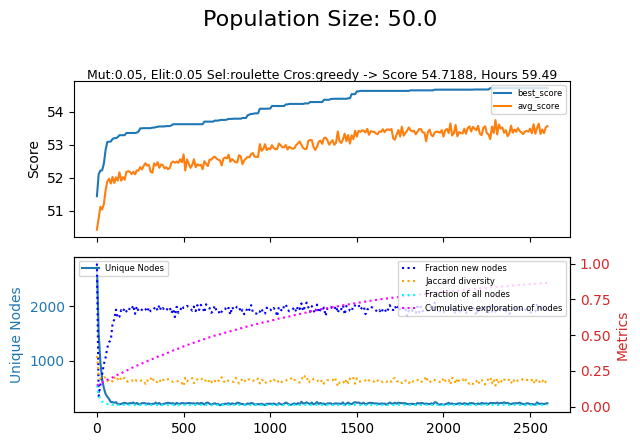

In [25]:
plot_performance_and_metrics(df_e[df_e['experiment_idx'] == 100], df_s[df_s['experiment_idx'] == 100])